# Logistic Regression

## 분류에 사용한다. (Classification)

예) 나이대별로 이메일을 클릭해서 열지 말지를 분류해 보자.

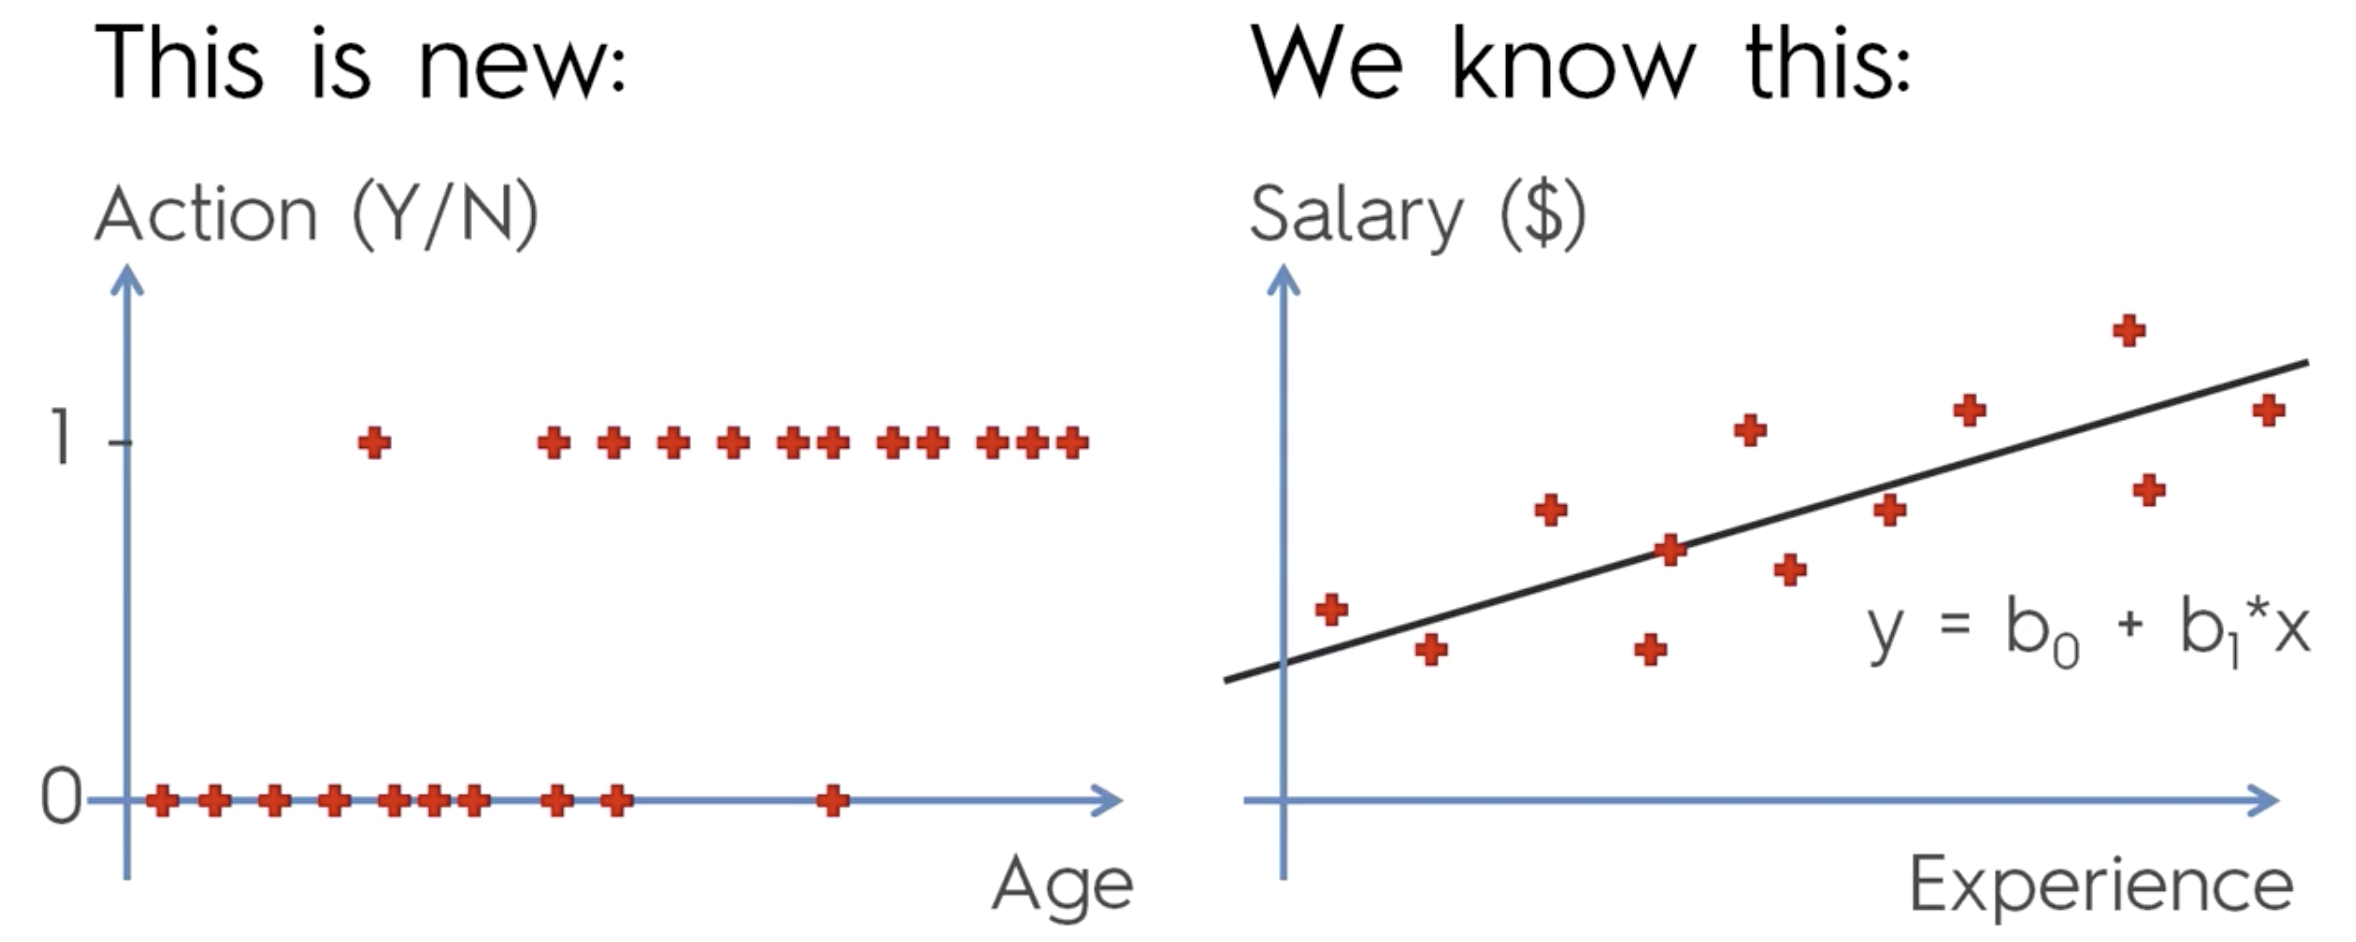

## 이메일 클릭을 할 사람과 안할 사람으로 분류할 것이다.

빨간점이 바로 데이터이며, 

액션의 0 과 1 이 바로 레이블이다. 

레이블이 있다는것은, 수퍼바이저드 러닝 이라는 뜻

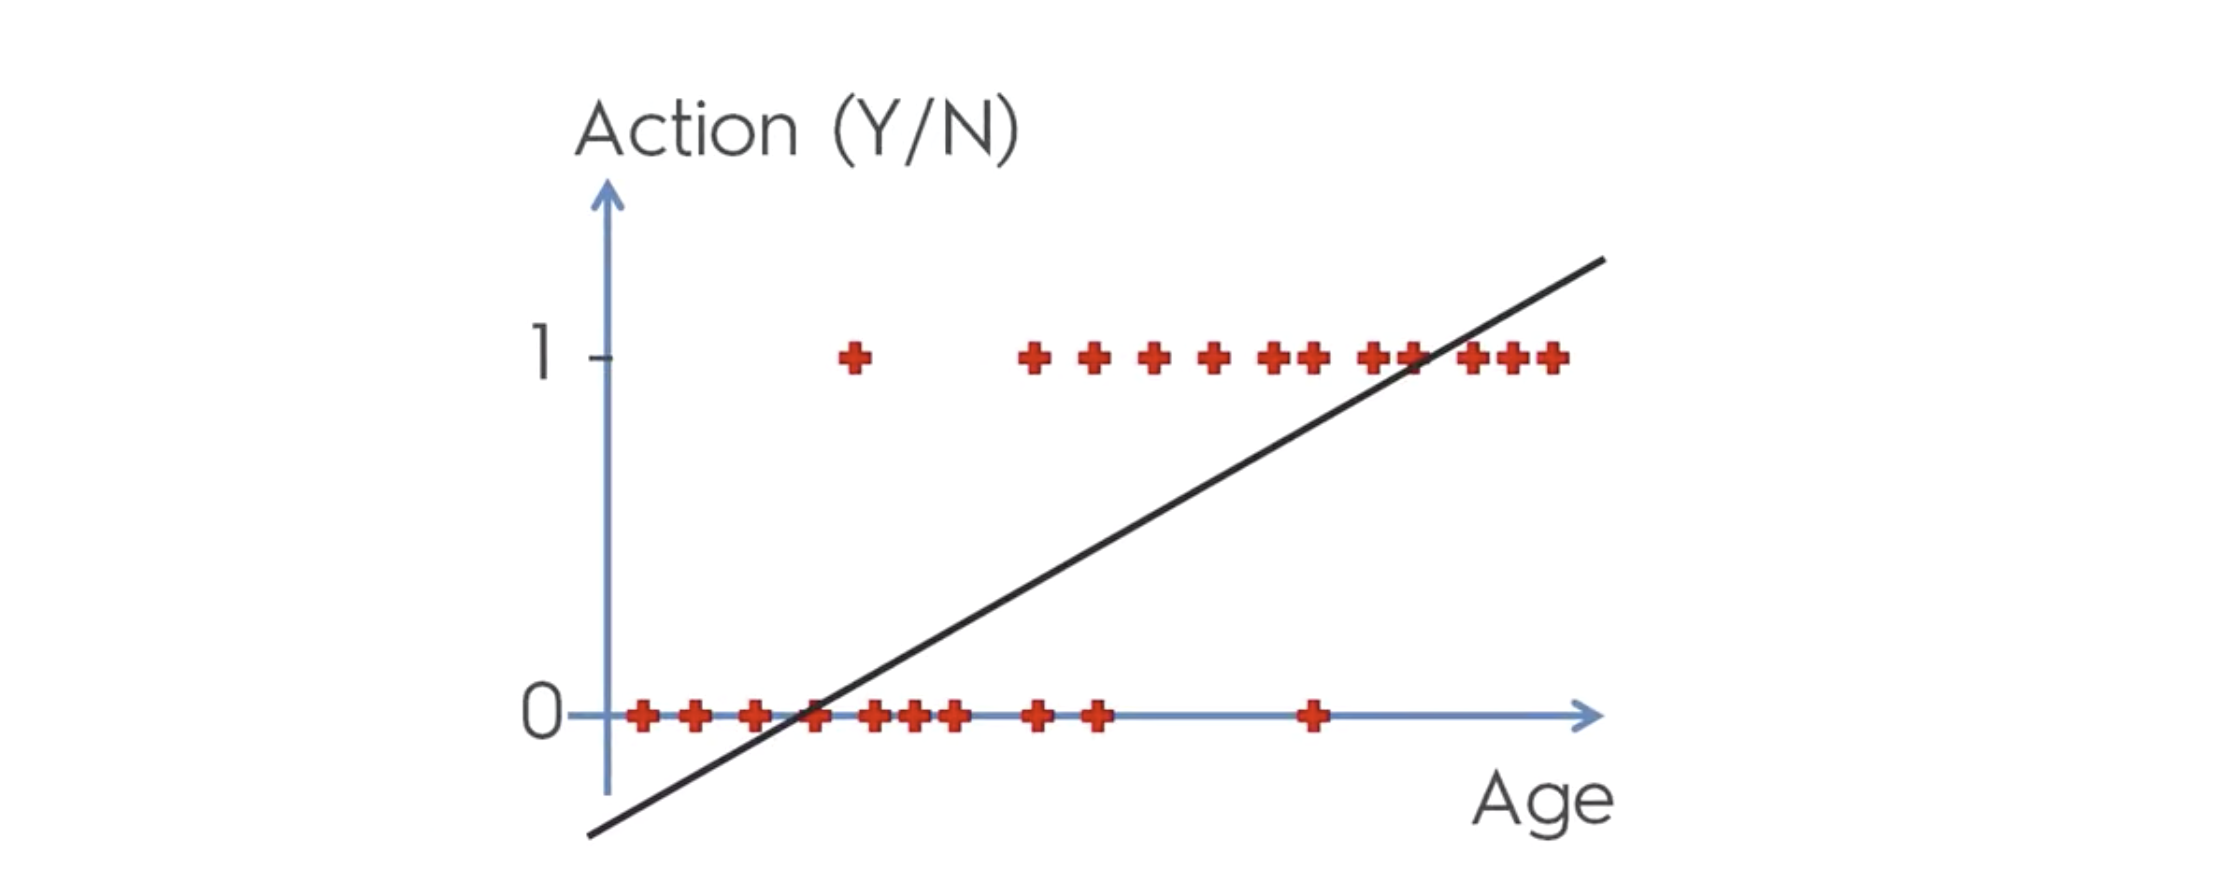

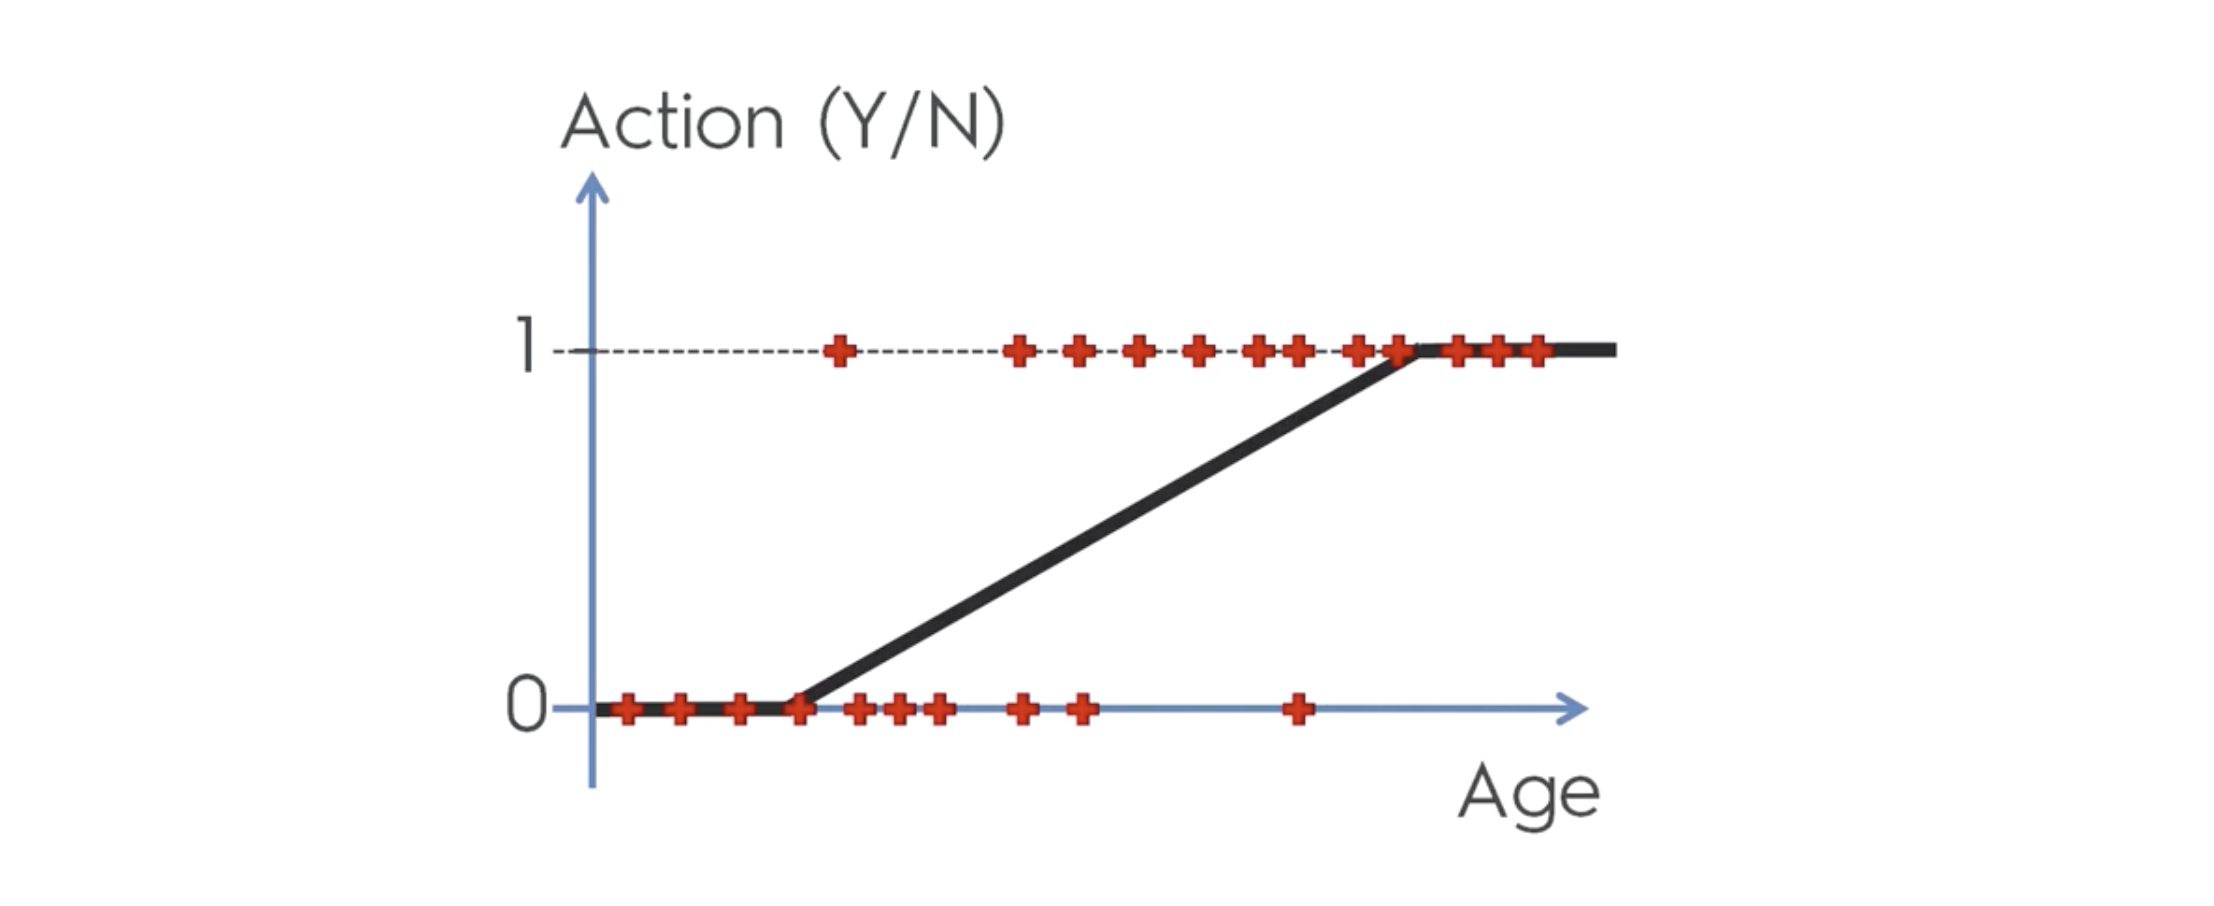

### 이렇게 비슷하게 생긴 함수가 이미존재한다. 이름은 sigmoid function

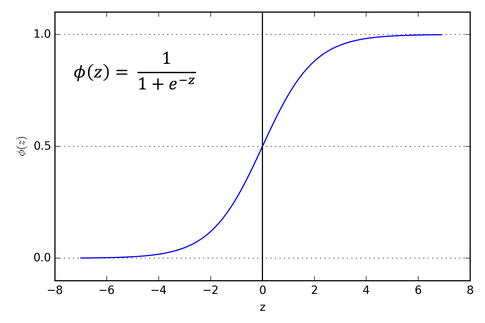

## 따라서 리니어 리그레션 식을, y 값을 시그모이드에 대입해서, 일차방정식으로 만들면 다음과 같아진다.

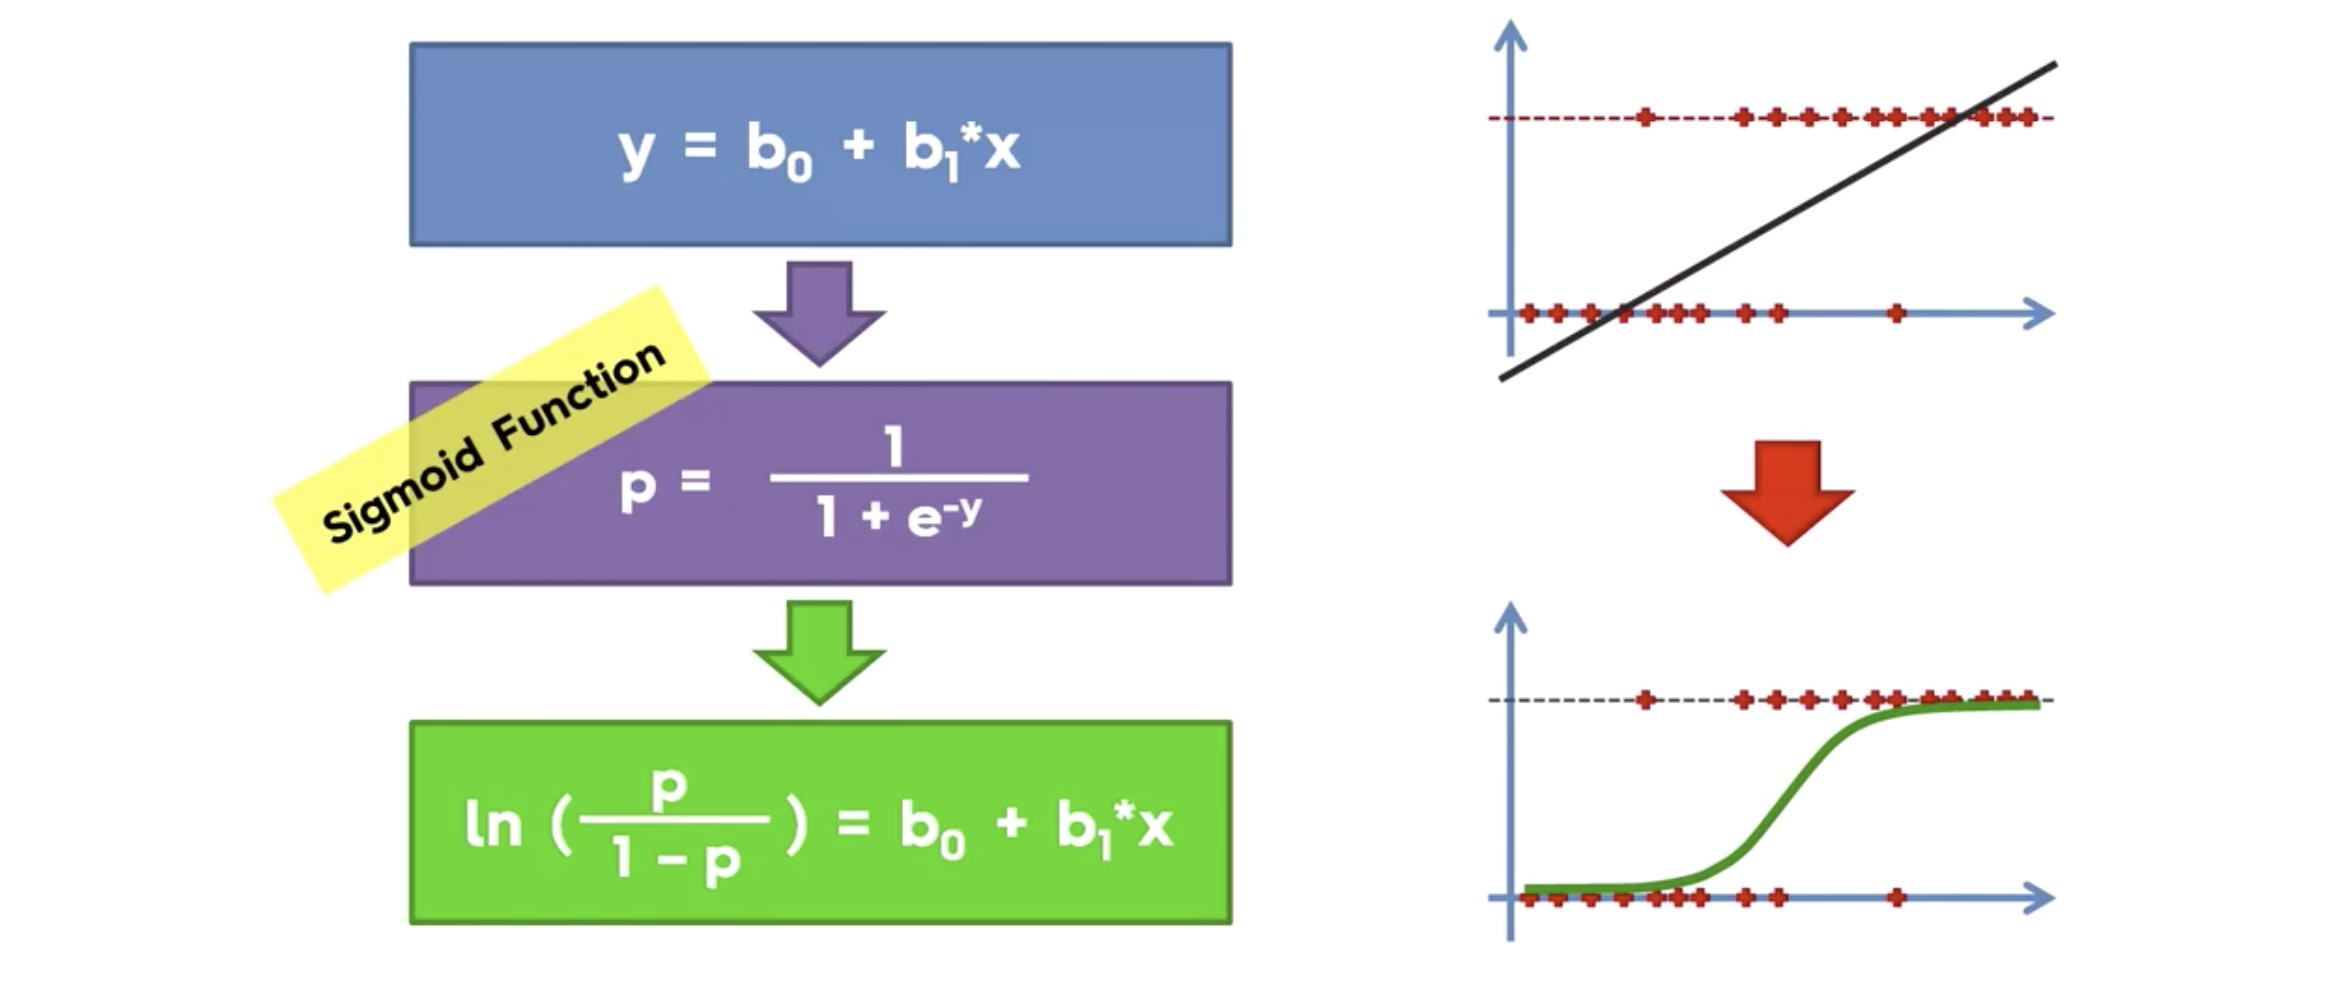

# 위와 같은 식을 가진 regression 을, Logistic Regression이라 한다.

## 이제 우리는, 이를 가지고 두개의 클래스로 분류할 수 있다. ( 클릭을 한다, 안한다 두개로.)

확률로 나타낼 수 있게 되었다.

p는 확률값을 나타낸다.

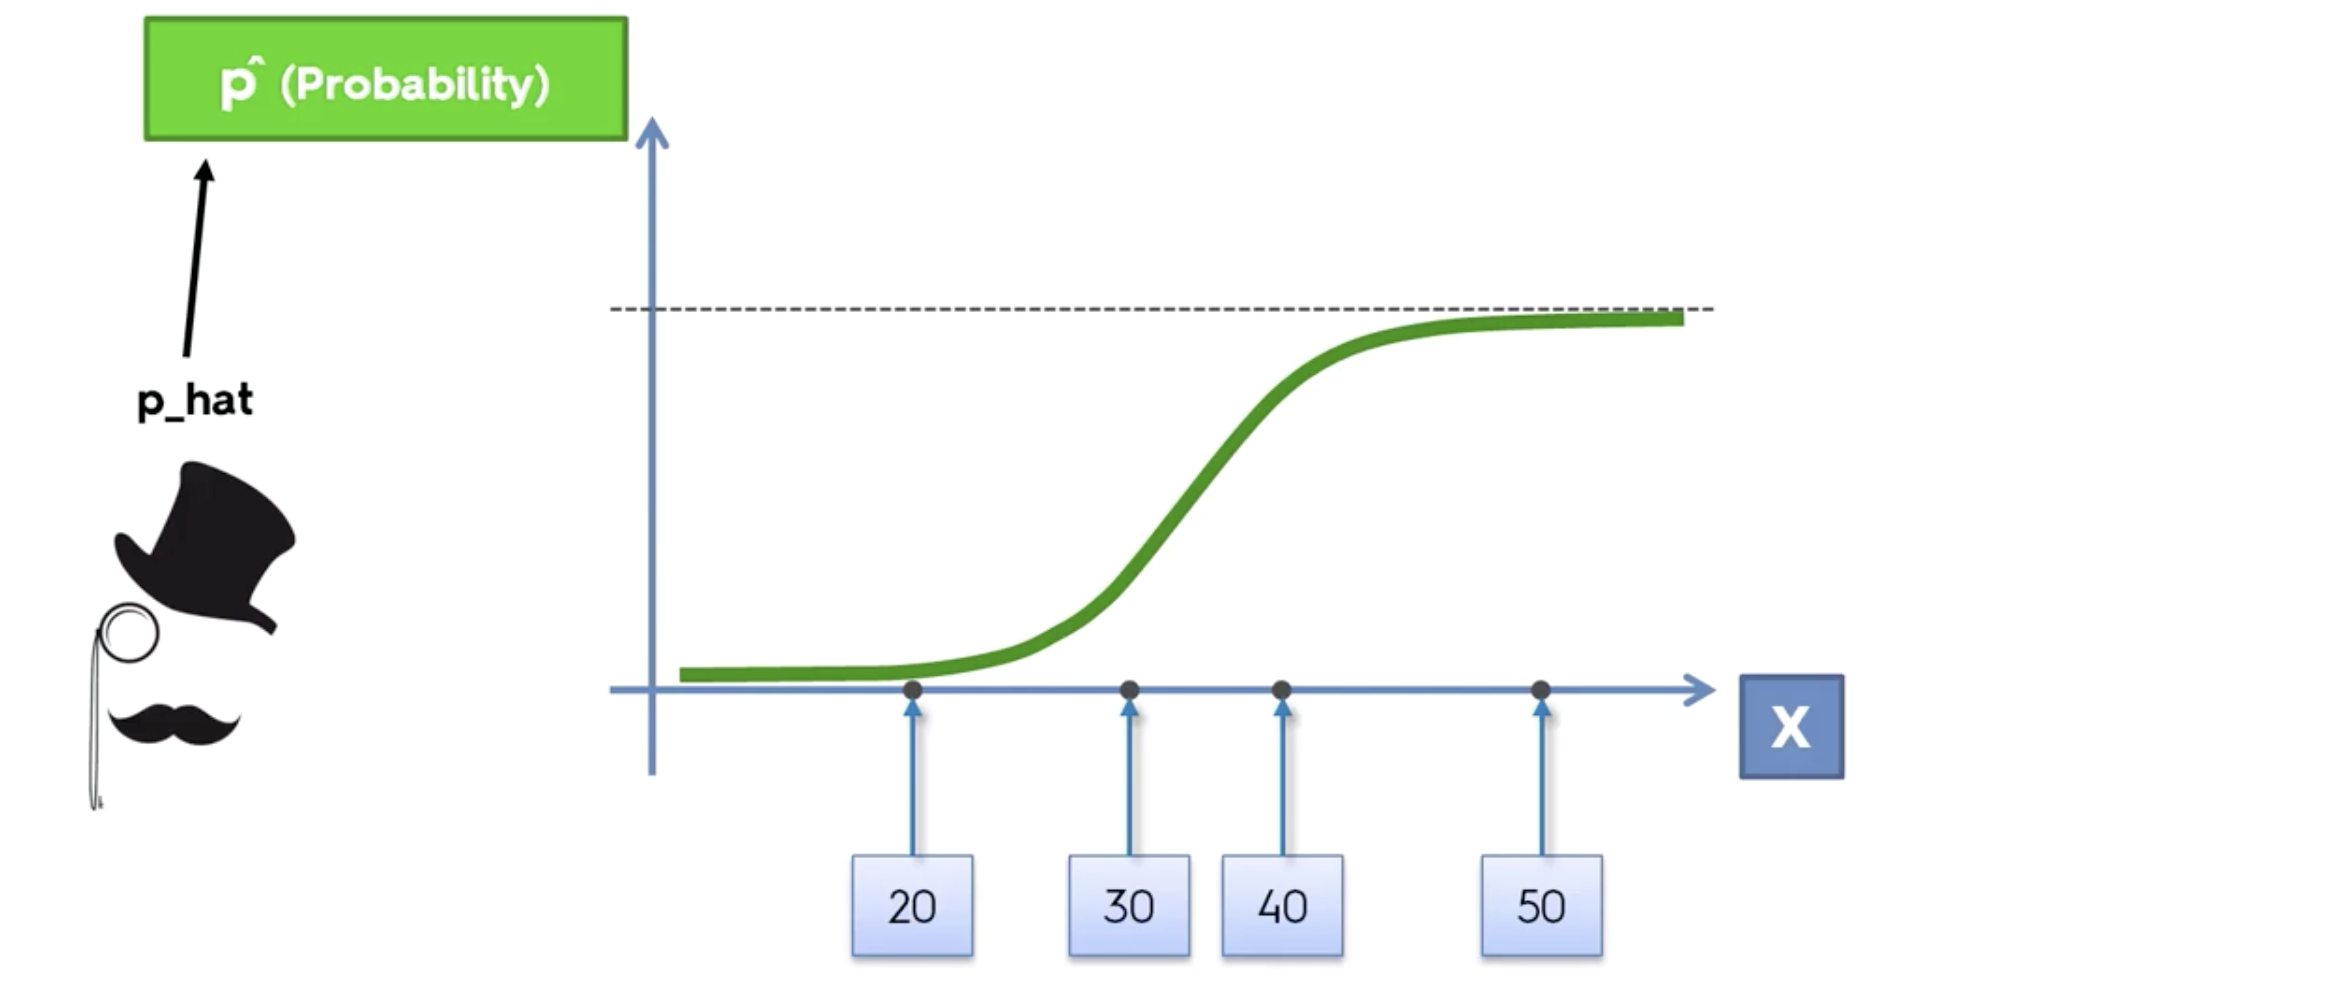

### 20대는 클릭할 확률이 0.7%,  40대는 85%, 50대는 99.4% 

이 확률값은, 위에서의 시그모이드 함수를 적용한 식을 통해 나온 값임을 기억한다.

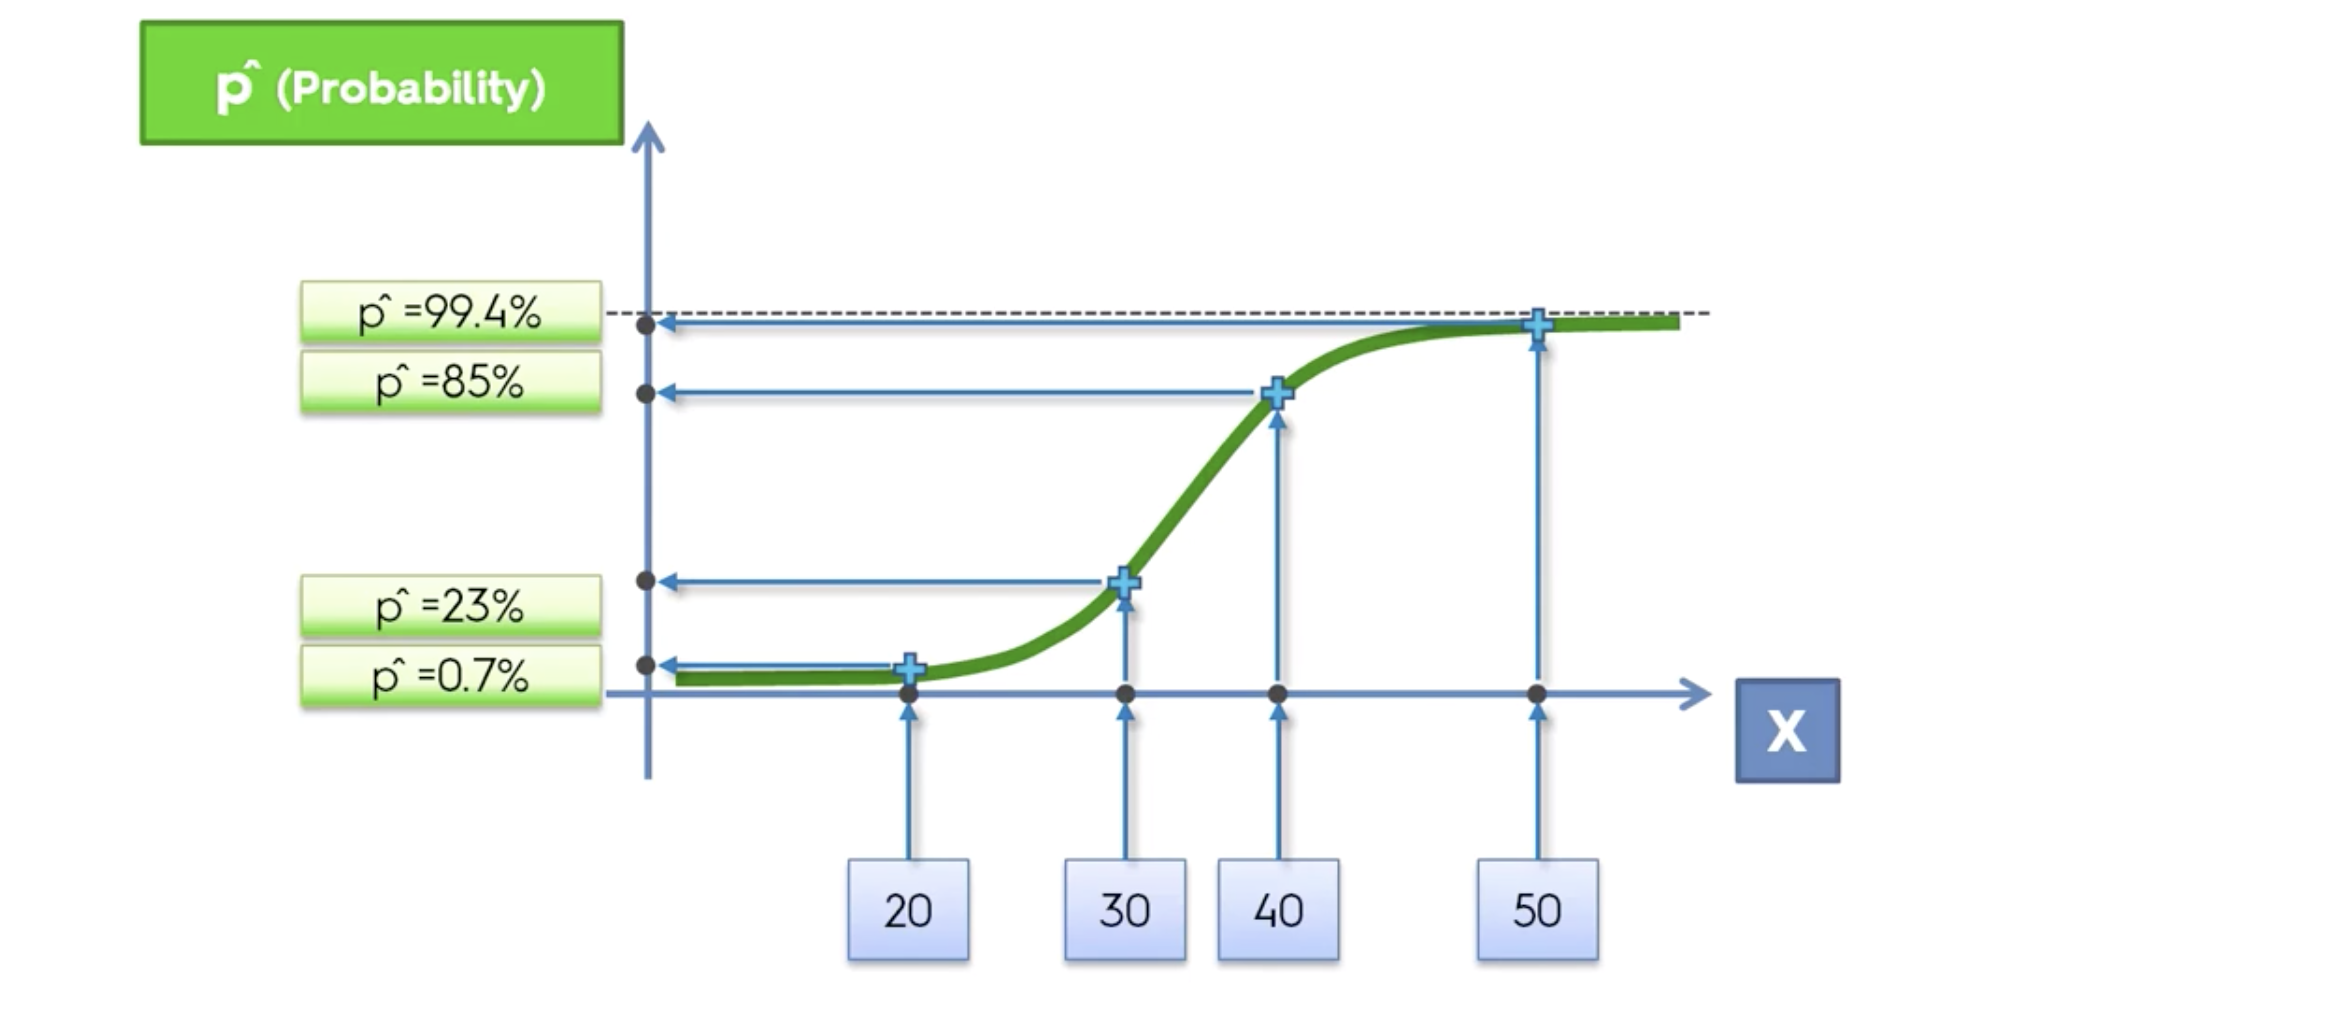

### 최종 예측값은, 0.5를 기준으로 두개의 부류로 나눈다. 그 값은 0 과 1 이다.

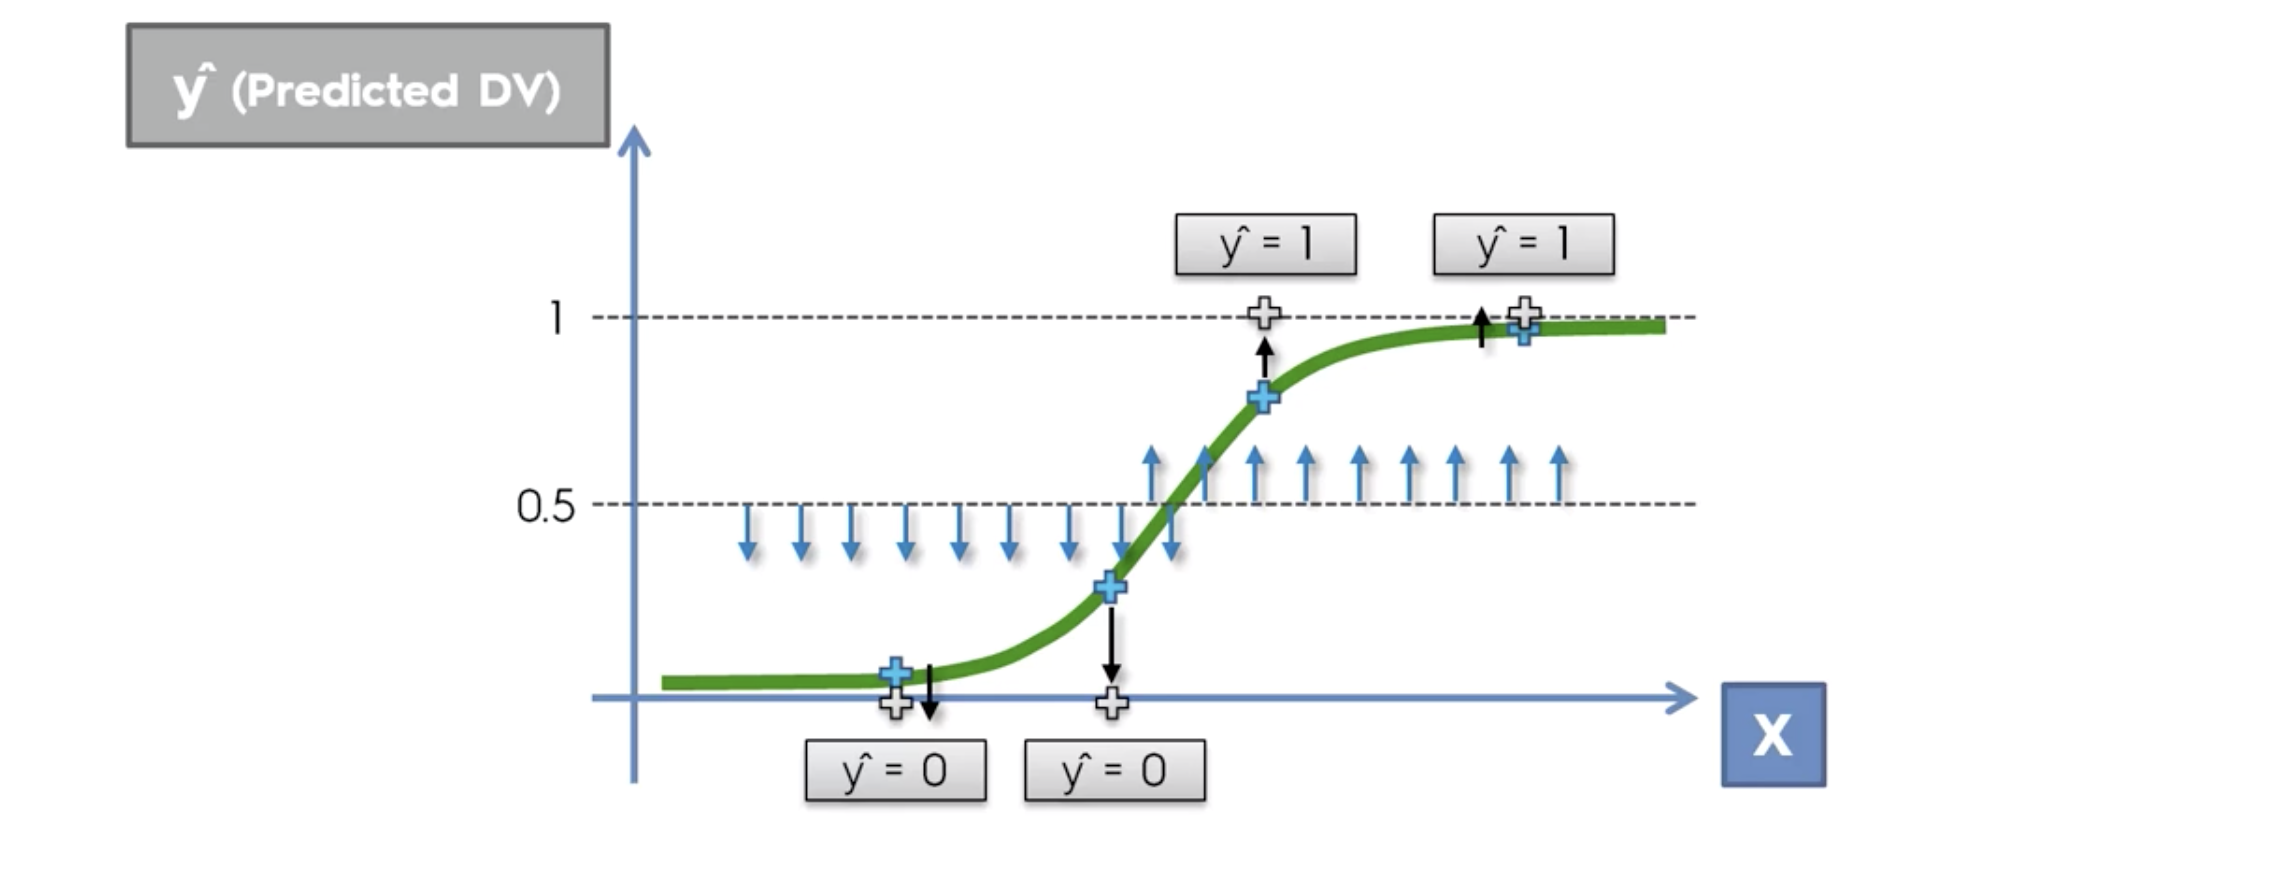

In [96]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [97]:
# 나이와 연봉으로 분석해서, 물건을 구매할지 안할지를 분류하자!!

In [98]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [99]:
dataset.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [100]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [101]:
X = dataset.iloc[:,[2,3]].values

In [102]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [103]:
y = dataset.Purchased.values

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
sc = StandardScaler()

In [108]:
X_train = sc.fit_transform(X_train) # 나이와 연봉은 숫자의 범주가 너무 다르니까,. 비슷하게 바꿔주는 작업..

In [109]:
X_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [110]:
X_test = sc.transform(X_test)

In [111]:
X_test #이렇게 나와야 학습을 잘 할 수 있음...

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ],
       [-1.10189888, -1.43757673],
       [-0.70576986, -1.58254245],
       [-0.21060859,  2.15757314],
       [-1.99318916, -0.04590581],
       [ 0.8787462 , -0.77073441],
       [-0.80480212, -0.59677555],
       [-1.00286662, -0.42281668],
       [-0.11157634, -0.42281668],
       [ 0.08648817,  0.21503249],
       [-1.79512465,  0.47597078],
       [-0.60673761,  1.37475825],
       [-0.11157634,  0.21503249],
       [-1.89415691,  0.44697764],
       [ 1.67100423,  1.75166912],
       [-0.30964085, -1.37959044],
       [-0.30964085, -0.65476184],
       [ 0.8787462 ,  2.15757314],
       [ 0.28455268, -0.53878926],
       [ 0.8787462 ,  1.02684052],
       [-1.49802789, -1.20563157],
       [ 1.07681071,  2.07059371],
       [-1.00286662,  0.50496393],
       [-0.90383437,  0.30201192],
       [-0.11157634,

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
classifier = LogisticRegression(random_state = 0)

In [114]:
classifier.fit(X_train, y_train) #학습

LogisticRegression(random_state=0)

In [115]:
y_pred = classifier.predict(X_test)

In [116]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [117]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

# Confusion Matrix

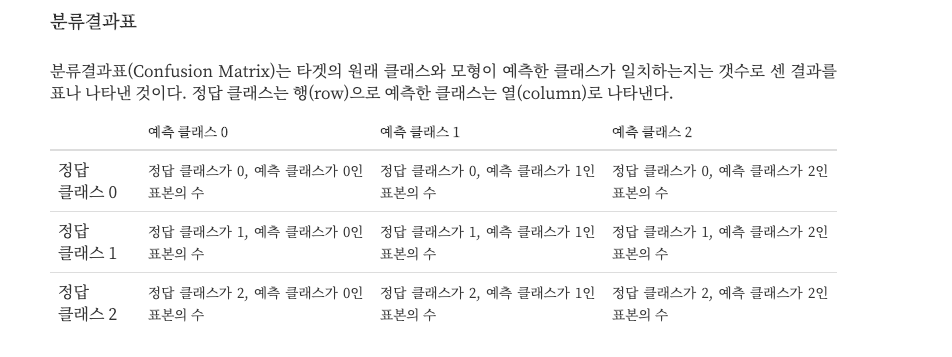

### 두 개의 클래스로 분류하는 경우는 아래와 같다.

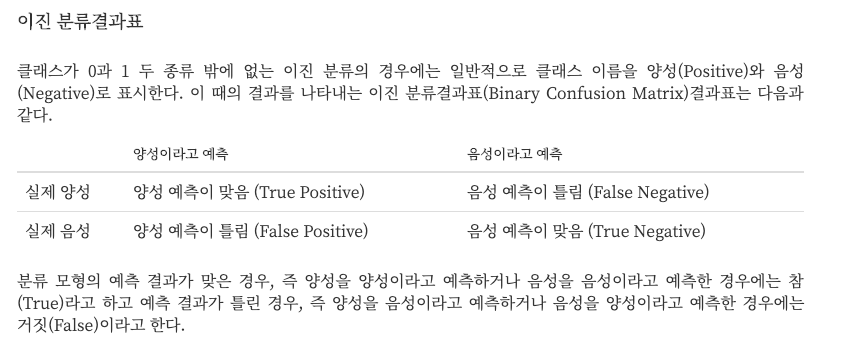

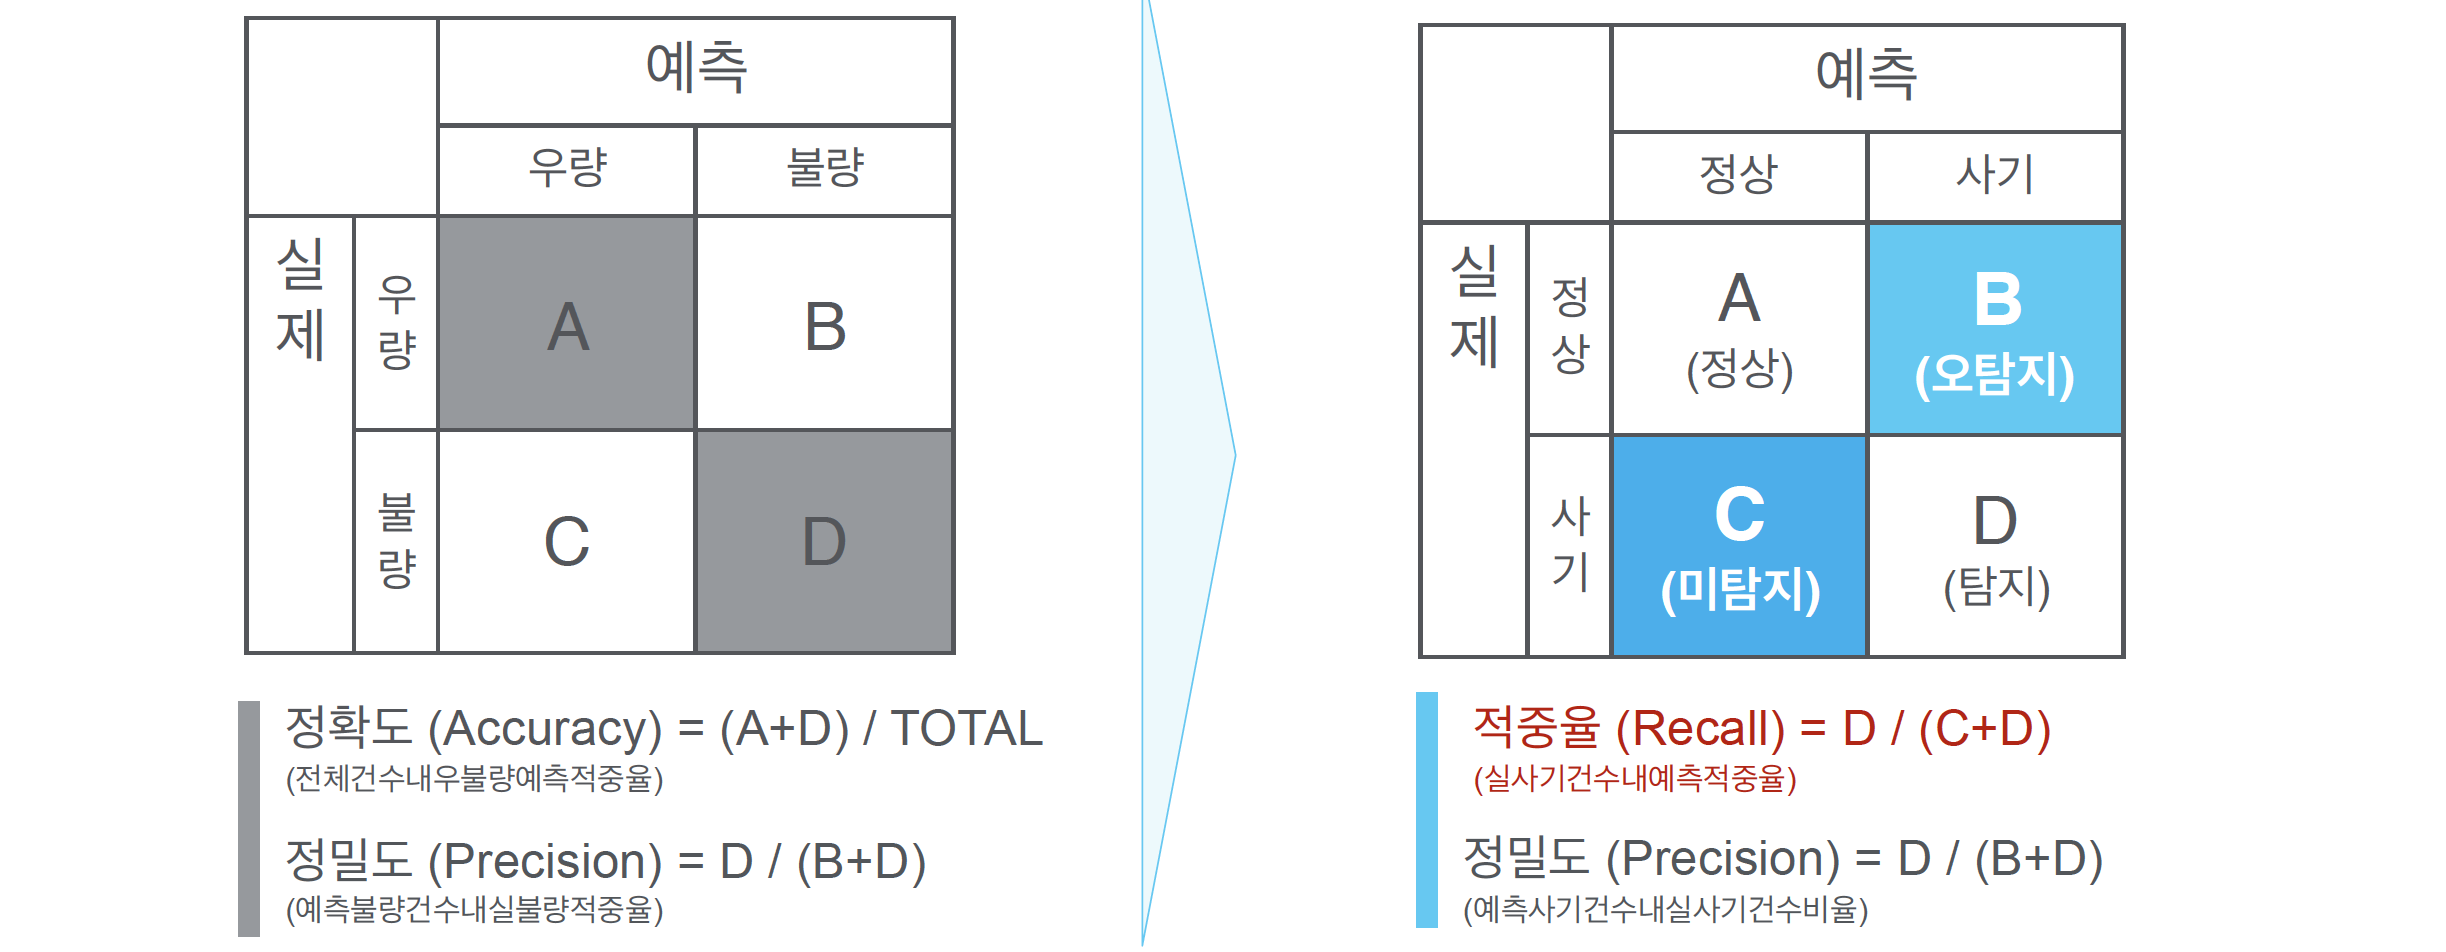

In [118]:
from sklearn.metrics import confusion_matrix

In [119]:
cm = confusion_matrix(y_test, y_pred) # 행, 열 = 실제값, 예측값

In [120]:
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [121]:
# accuracy(정확도)
(65+24) / cm.sum() #정확도는 89% 의 인공지능..

0.89

In [122]:
# 새로운 사람이 회원가입했다? 나이는 36, 연봉 27000 일때, 이 사람이 물건을 구매할 확률....

In [123]:
new_ID = np.array([36, 27000])

In [124]:
new_ID = new_ID.reshape(1,2)

In [125]:
new_ID #위에는 스케일링 해줘서 학습시켜놓고 왜 얘는 안해주냐! 

array([[   36, 27000]])

In [126]:
new_ID = sc.transform(new_ID) 
#fit_transform은 위에 학습시킬때 쓰는거고, 새로운 데이터는 이미 학습된 데이터랑 비교하는 것이기 때문에 그냥 transform

In [127]:
new_ID

array([[-0.21060859, -1.23462472]])

In [128]:
classifier.predict(new_ID)

array([0], dtype=int64)

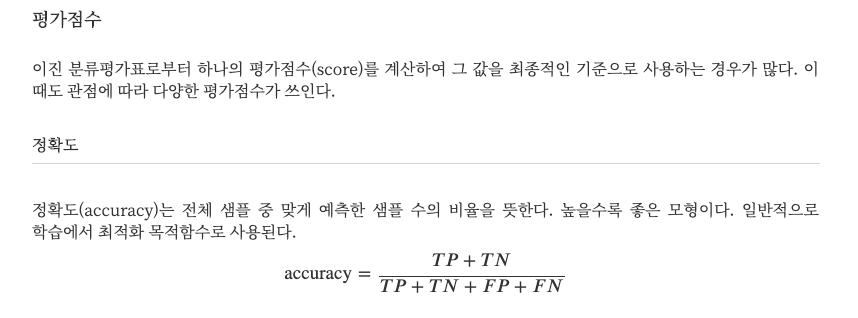

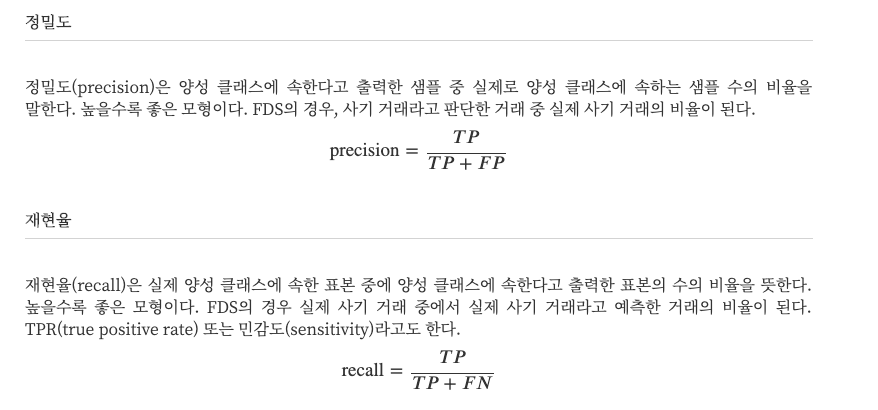

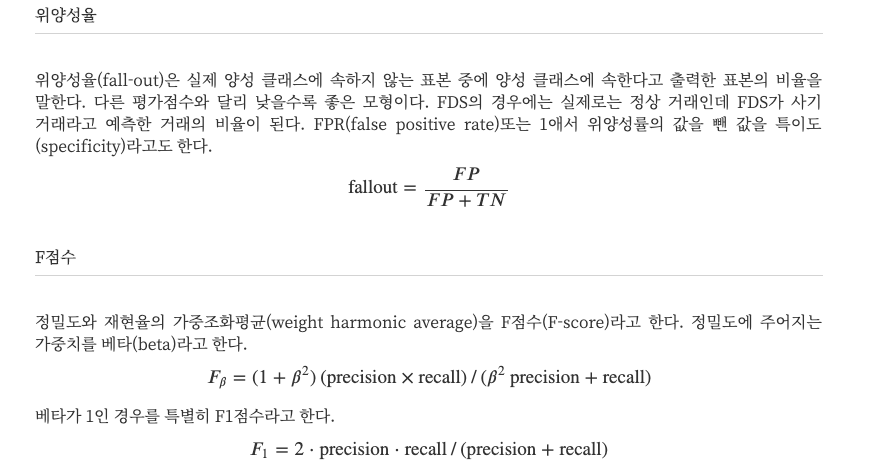

### 아래 코드는, 그대로 활용하면 됩니다.

In [ ]:
# 아래는, 테스트 데이터로 나온 예측 결과를 나타낸 것이다. Confusion Matrix 와 같다.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


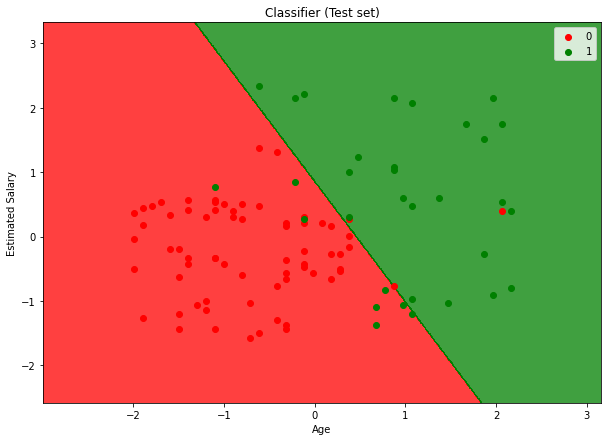

In [129]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=[10,7])
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# 아래는 학습에 사용된 데이터를 그래프로 나타낸 것입니다.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


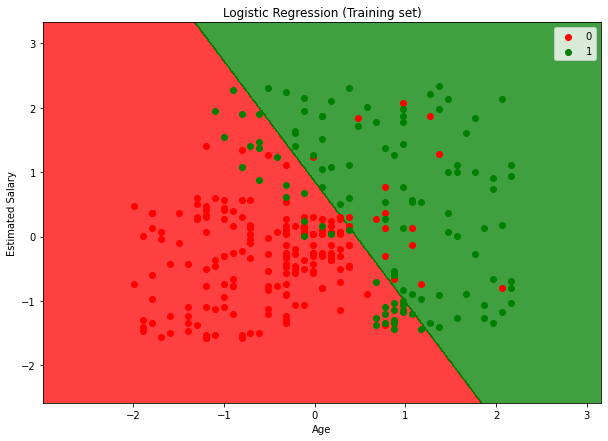

In [130]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=[10,7])
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()